In [51]:
from warnings import filterwarnings

filterwarnings("ignore")

import pandas as pd
import numpy as np
from pyts.image import GramianAngularField
from matplotlib import pyplot as plt

from ta import add_all_ta_features

from multiprocessing import Pool, cpu_count

from modules.data_fetcher import download_historical_data


In [52]:
symbol = "BTC-USDT"

df_BTC = download_historical_data(symbol, "1day").loc["2020-11-20":]

# df_BTC["Log_Close"] = np.log(df_BTC.Close.apply(lambda x: 1.0 if x == 0.0 else x))
# df_BTC["Returns"] = df_BTC.Close.pct_change()
# df_BTC["Log_Returns"] = df_BTC.Log_Close.pct_change()
# df_BTC["Log_Volume"] = np.log(
#     np.abs(df_BTC.Volume.apply(lambda x: 1.0 if x == 0.0 else x))
# )
# df_BTC["Vol20"] = df_BTC.Log_Returns.rolling(20).std()
# df_BTC["EMA20"] = df_BTC.Close.ewm(20).mean()


df_BTC.drop(columns=['Timestamp'],inplace=True)
df_BTC.dropna(inplace=True)
print(df_BTC.shape)
df_BTC.head()

(871, 6)


,Open,Close,High,Low,Amount,Volume
Date,,,,,,
2020-11-20 01:00:00,17802.8,18659.4,18808.6,17747.4,2195.473348,4.032508e+07
2020-11-21 01:00:00,18659.4,18702.2,18964.9,18322.3,2063.264695,3.856744e+07
2020-11-22 01:00:00,18702.2,18416.9,18749.1,17622.2,2373.600444,4.350419e+07
2020-11-23 01:00:00,18415.1,18370.6,18762.0,18009.0,2338.730168,4.307173e+07
2020-11-24 01:00:00,18370.3,19153.2,19412.5,17999.9,3392.945212,6.402286e+07


In [ ]:
add_all_ta_features(df_BTC,df_BTC)

In [43]:
from pyts.datasets import load_gunpoint
from pyts.image import GramianAngularField

X, X_test, y, y_test = load_gunpoint(return_X_y=True)
X.shape

(50, 150)

In [44]:
X.shape, X

((50, 150),
 array([[-0.6478854 , -0.64199155, -0.63818632, ..., -0.64042873,
         -0.63866571, -0.63865722],
        [-0.64442658, -0.64540093, -0.64705511, ..., -0.6349345 ,
         -0.6344968 , -0.63159565],
        [-0.77835282, -0.77827907, -0.77715084, ..., -0.70419626,
         -0.70760524, -0.7071202 ],
        ...,
        [-0.77912617, -0.77837863, -0.7757449 , ..., -0.50500603,
         -0.50373099, -0.50438486],
        [-0.70303339, -0.70261754, -0.70250356, ..., -0.64113375,
         -0.64140622, -0.64210896],
        [-1.4357199 , -1.4322717 , -1.4329285 , ..., -1.4354619 ,
         -1.4352821 , -1.4308845 ]]))

In [45]:
df_BTC.iloc[-200:].values.shape, df_BTC.iloc[-200:].values

((200, 12),
 array([[1.84563000e+04, 1.94012000e+04, 1.95200000e+04, ...,
         1.94673447e+01, 4.13176689e-03, 2.06318643e+04],
        [1.94012000e+04, 1.92892000e+04, 1.94944000e+04, ...,
         1.92403618e+01, 4.13170737e-03, 2.05679279e+04],
        [1.92892000e+04, 1.89206000e+04, 1.93128000e+04, ...,
         1.92486521e+01, 4.14404762e-03, 2.04894837e+04],
        ...,
        [2.80303000e+04, 2.79060000e+04, 2.81018000e+04, ...,
         1.79501345e+01, 2.20647519e-03, 2.60995164e+04],
        [2.79060000e+04, 2.80121000e+04, 2.81526000e+04, ...,
         1.72521900e+01, 2.03843578e-03, 2.61905918e+04],
        [2.79392000e+04, 2.78974000e+04, 2.80799000e+04, ...,
         1.67672854e+01, 2.03070830e-03, 2.62718684e+04]]))

In [46]:
transformer = GramianAngularField(flatten=False)
X_new = transformer.transform(X[:,:30])
X_new.shape

(50, 30, 30)

In [47]:
transformer = GramianAngularField(flatten=False)
X_new = transformer.transform(df_BTC.iloc[-200:].values)
X_new.shape

(200, 12, 12)

[]

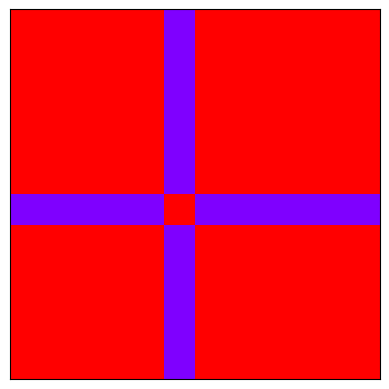

In [50]:

# gadf = GramianAngularField(image_size=60, method='difference')
# X_gadf = gadf.fit_transform(df_BTC.drop(columns=['Timestamp']).iloc[-200:].values)
# X_gadf

fig = plt.figure()
ax = plt.subplot(111)
ax.imshow(X_new[10], cmap='rainbow', origin='lower')
ax.set_title('')
ax.set_xticks([])
ax.set_yticks([])

In [ ]:


gadf = GramianAngularField(image_size=60, method='difference')
X_gadf = gadf.fit_transform(X)

def convert_img(idx):
    fig = plt.figure()
    ax = plt.subplot(111)
    try:
        fname = f'imgs/{idx}.png'
        if os.path.exists(fname):
            return
    except:
        return
    ax.imshow(X_gadf[idx], cmap='rainbow', origin='lower')
    ax.set_title('')
    ax.set_xticks([])
    ax.set_yticks([])
    fig.savefig(fname, bbox_inches='tight')
    
p = Pool(cpu_count())
_ = p.map(convert_img, (i for i in range(1070)))

In [ ]:
data = (ImageList.from_csv('imgs', 'labels.csv')
                 .split_by_idxs(list(range(700)), list(range(700, 900)))
                 .label_from_df()
                 .databunch())

learner = cnn_learner(data, models.resnet34, loss_func=mae, metrics=[r2_score])
learner.model[1]
# Sequential(
#   (0): AdaptiveConcatPool2d(
#     (ap): AdaptiveAvgPool2d(output_size=1)
#     (mp): AdaptiveMaxPool2d(output_size=1)
#   )
#   (1): Flatten()
#   (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
#   (3): Dropout(p=0.25, inplace=False)
#   (4): Linear(in_features=1024, out_features=512, bias=True)
#   (5): ReLU(inplace=True)
#   (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
#   (7): Dropout(p=0.5, inplace=False)
#   (8): Linear(in_features=512, out_features=1, bias=True)
# )